# 导包

In [13]:
"""Tutorial for using pandas and the InfluxDB client."""

import argparse
import pandas as pd

from influxdb import DataFrameClient

# 配置

In [14]:
user = 'root'
password = 'root'
dbname = 'demo'
protocol = 'line'
port = 8086
host = '127.0.0.1'
client = DataFrameClient(host, port, user, password, dbname)

# 创建dataframe数据

In [56]:
df = pd.DataFrame(data=list(range(10)),index=pd.date_range(start='2014-11-16',periods=10, freq='M'), columns=['num'])
df.head(5)
# print("Create database: " + dbname)
# client.create_database(dbname)


,num
2014-11-30,0
2014-12-31,1
2015-01-31,2
2015-02-28,3
2015-03-31,4


# 使用dataframe画图

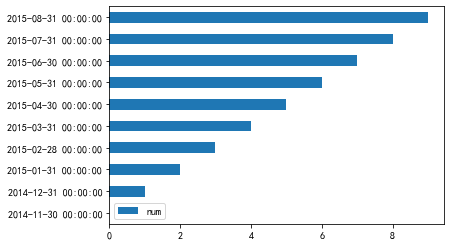

In [57]:
df.plot.barh()

# 使用snsborn画图

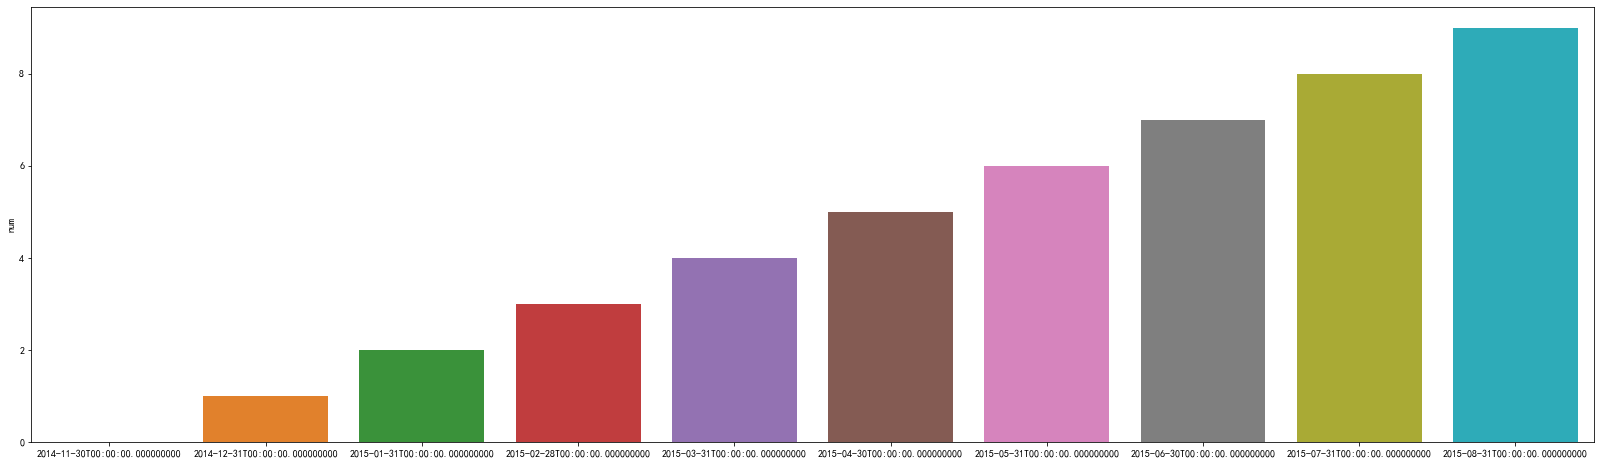

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(28,8))
sns.barplot(y=df['num'],x=df.index)

# 创建database

In [64]:
client.create_database(dbname)

# 写入数据库 

In [65]:
client.write_points(df, 'demo', protocol=protocol)

True

# 添加标签

In [66]:
print("Write DataFrame with Tags")
client.write_points(df, 'demo',{'k1': 'v1', 'k2': 'v2'}, protocol=protocol)

Write DataFrame with Tags


True

# 使用sql语句查询

In [67]:
client.query("select * from demo limit 10")

defaultdict(list,
            {'demo':                              k1    k2  num
             2014-11-30 00:00:00+00:00  None  None    0
             2014-11-30 00:00:00+00:00    v1    v2    0
             2014-12-31 00:00:00+00:00  None  None    1
             2014-12-31 00:00:00+00:00    v1    v2    1
             2015-01-31 00:00:00+00:00  None  None    2
             2015-01-31 00:00:00+00:00    v1    v2    2
             2015-02-28 00:00:00+00:00  None  None    3
             2015-02-28 00:00:00+00:00    v1    v2    3
             2015-03-31 00:00:00+00:00  None  None    4
             2015-03-31 00:00:00+00:00    v1    v2    4})

# 删除database

In [68]:
client.drop_database(dbname)